# Instalasi dan import

In [1]:
!pip install lpips
!pip install scikit-image

In [2]:
!pip install torch-fidelity

In [3]:
import cv2
import numpy as np
import lpips
import torch
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from matplotlib import pyplot as plt

# Kompresi

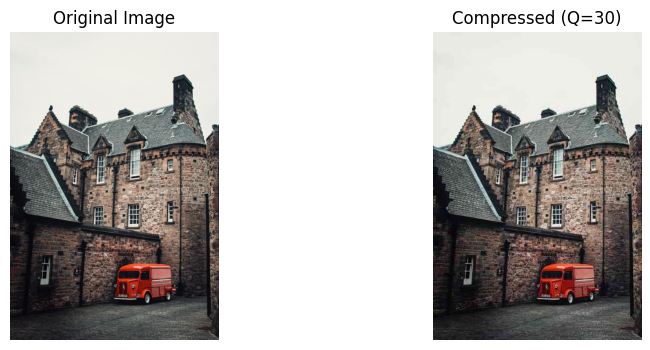

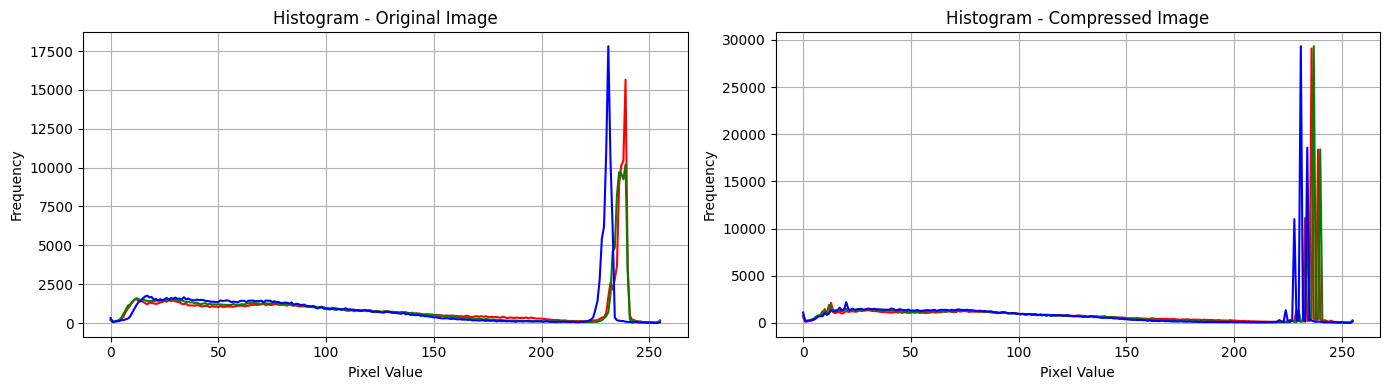

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import FileLink

# Link direct ke file Google Drive
# url = 'https://drive.google.com/uc?id=1vHJNVvjiGM_0hjLMk58GpFb7tKXK3t5a'
url = 'https://drive.google.com/uc?id=1-zJfXSzsidcOGddKEbHO2ywh3s1lAJMu'

# Ambil gambar dari URL dan konversi
response = requests.get(url)
img1 = Image.open(BytesIO(response.content)).convert('RGB')
img1 = np.array(img1)

# Simpan ulang sebagai JPEG untuk simulasi kompresi
compressed_path = '/content/compressed.jpg'
cv2.imwrite(compressed_path, cv2.cvtColor(img1, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_JPEG_QUALITY), 30])

# Baca ulang hasil kompresi
img2 = cv2.imread(compressed_path)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize jika ukuran beda
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Tampilkan gambar
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img1); plt.title("Original Image"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.title("Compressed (Q=30)"); plt.axis('off')
plt.show()

# Tampilkan histogram RGB
# def plot_histogram(image, title="Histogram"):
#     colors = ('r','g','b')
#     plt.figure(figsize=(8,4))
#     for i, col in enumerate(colors):
#         hist = cv2.calcHist([image], [i], None, [256], [0, 256])
#         plt.plot(hist, color=col)
#     plt.title(title)
#     plt.xlabel("Pixel Value")
#     plt.ylabel("Frequency")
#     plt.grid(True)
#     plt.show()

# plot_histogram(img1, title="Histogram - Original Image")
# plot_histogram(img2, title="Histogram - Compressed Image")

def plot_histogram(image, title, ax):
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=col)
    ax.set_title(title)
    ax.set_xlabel("Pixel Value")
    ax.set_ylabel("Frequency")
    ax.grid(True)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_histogram(img1, title="Histogram - Original Image", ax=axes[0])
plot_histogram(img2, title="Histogram - Compressed Image", ax=axes[1])

plt.tight_layout()
plt.show()

from google.colab import files
# Unduh langsung file ke komputer
files.download('/content/compressed.jpg')


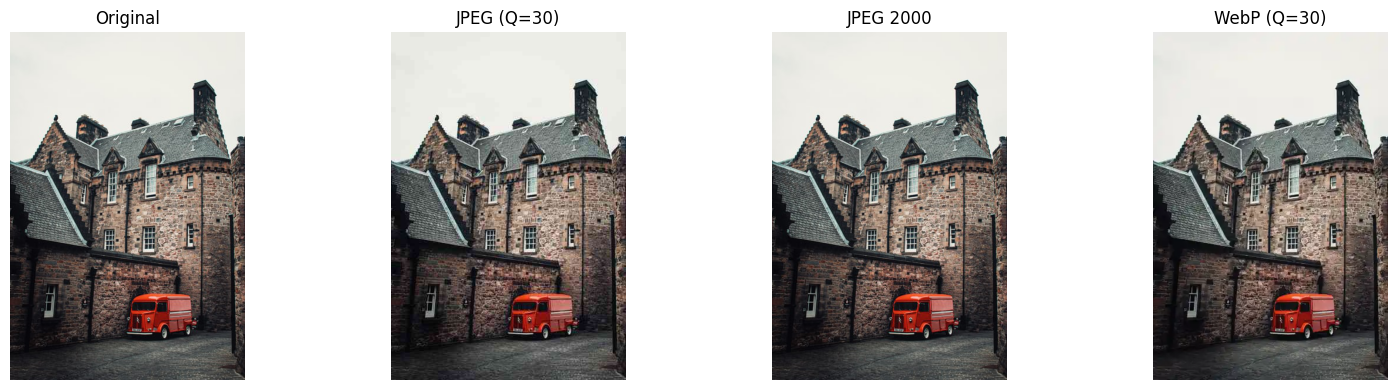

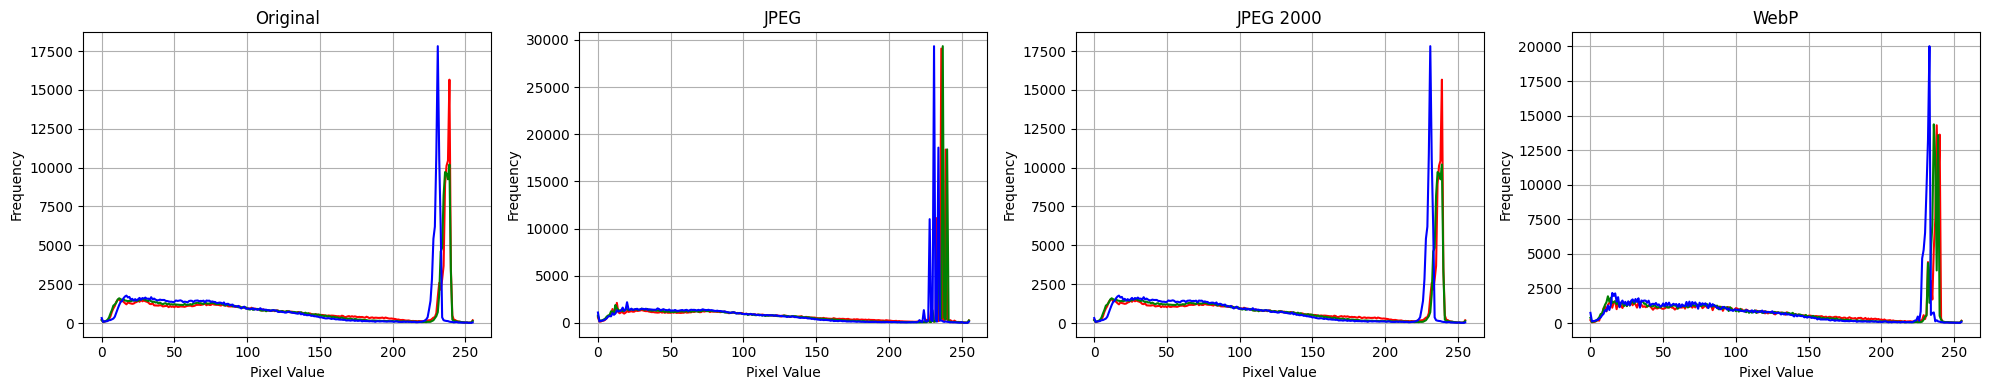

Unduh hasil kompresi:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import FileLink
from google.colab import files
import os

# ======================
# 📥 1. Download Image
# ======================
# url = 'https://drive.google.com/uc?id=1vHJNVvjiGM_0hjLMk58GpFb7tKXK3t5a'
url = 'https://drive.google.com/uc?id=1-zJfXSzsidcOGddKEbHO2ywh3s1lAJMu'

response = requests.get(url)
img1 = Image.open(BytesIO(response.content)).convert('RGB')
img1 = np.array(img1)

# ======================
# 🔧 2. Simpan ulang sebagai JPEG
# ======================
jpeg_path = '/content/compressed.jpg'
cv2.imwrite(jpeg_path, cv2.cvtColor(img1, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_JPEG_QUALITY), 30])

# ======================
# 🔧 3. Simpan sebagai JPEG 2000
# ======================
jp2_path = '/content/compressed.jp2'
Image.fromarray(img1).save(jp2_path, format='JPEG2000')

# ======================
# 🔧 4. Simpan sebagai WebP
# ======================
webp_path = '/content/compressed.webp'
Image.fromarray(img1).save(webp_path, format='WebP', quality=30)

# ======================
# 📤 5. Load ulang hasil kompresi
# ======================
img_jpeg = cv2.imread(jpeg_path)
img_jpeg = cv2.cvtColor(img_jpeg, cv2.COLOR_BGR2RGB)

img_jp2 = np.array(Image.open(jp2_path).convert('RGB'))
img_webp = np.array(Image.open(webp_path).convert('RGB'))

# Resize jika ukuran beda
for img in [img_jp2, img_webp]:
    if img.shape != img1.shape:
        img = cv2.resize(img, (img1.shape[1], img1.shape[0]))

# ======================
# 🎨 6. Tampilkan hasil
# ======================
titles = ["Original", "JPEG (Q=30)", "JPEG 2000", "WebP (Q=30)"]
images = [img1, img_jpeg, img_jp2, img_webp]

plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# ======================
# 📊 7. Histogram function
# ======================
# def plot_histogram(image, title="Histogram"):
#     colors = ('r','g','b')
#     plt.figure(figsize=(6,3))
#     for i, col in enumerate(colors):
#         hist = cv2.calcHist([image], [i], None, [256], [0,256])
#         plt.plot(hist, color=col)
#     plt.title(title)
#     plt.xlabel("Pixel Value")
#     plt.ylabel("Frequency")
#     plt.grid(True)
#     plt.show()

# # Tampilkan histogram masing-masing
# plot_histogram(img1, "Original")
# plot_histogram(img_jpeg, "JPEG")
# plot_histogram(img_jp2, "JPEG 2000")
# plot_histogram(img_webp, "WebP")

def plot_histogram(image, title, ax):
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=col)
    ax.set_title(title)
    ax.set_xlabel("Pixel Value")
    ax.set_ylabel("Frequency")
    ax.grid(True)

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

plot_histogram(img1, "Original", axes[0])
plot_histogram(img_jpeg, "JPEG", axes[1])
plot_histogram(img_jp2, "JPEG 2000", axes[2])
plot_histogram(img_webp, "WebP", axes[3])

plt.tight_layout()
plt.show()

# ======================
# ⬇️ 8. Sediakan link download
# ======================
print("Unduh hasil kompresi:")
for path in [jpeg_path, jp2_path, webp_path]:
    files.download(path)


# Noise dan Denoising

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


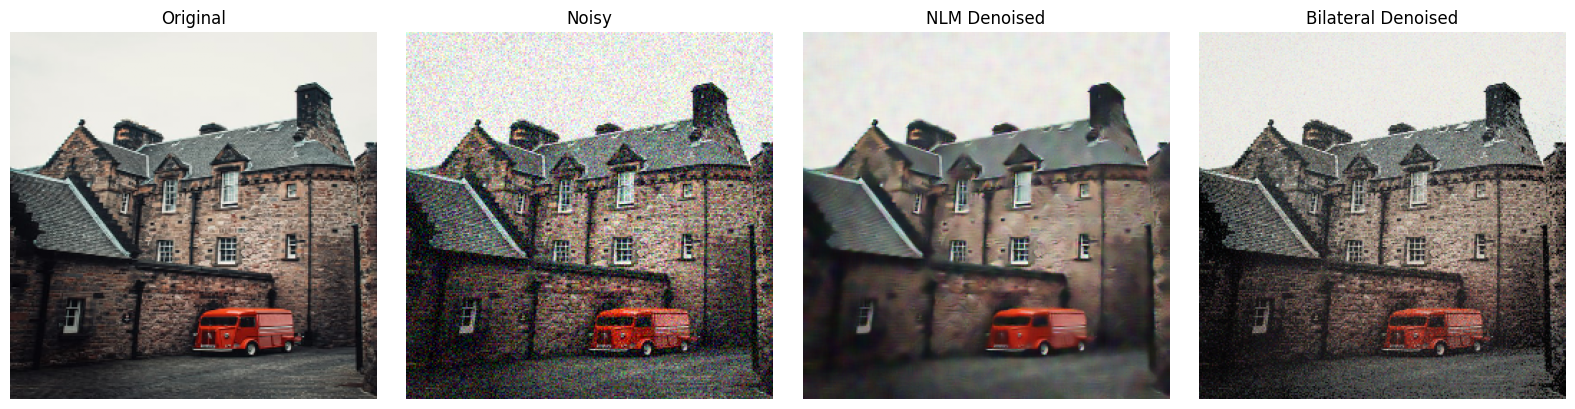

In [7]:
from skimage.restoration import estimate_sigma, denoise_nl_means, denoise_bilateral
from skimage.util import random_noise
from skimage import img_as_float
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load gambar
img = img1
img = cv2.resize(img, (256,256))
img = img_as_float(img)

# Tambahkan Gaussian noise
noisy = random_noise(img, var=0.01)  # Noise level ~ sigma^2

# Estimasi noise (untuk NLM)
sigma_est = np.mean(estimate_sigma(noisy, channel_axis=-1))

# Denoising NLM (Non-Local Means)
denoised_nlm = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=True,
                                 patch_size=5, patch_distance=3, channel_axis=-1)

# Denoising Bilateral
denoised_bilateral = denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)

# Tampilkan hasil
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img); ax[0].set_title('Original')
ax[1].imshow(noisy); ax[1].set_title('Noisy')
ax[2].imshow(denoised_nlm); ax[2].set_title('NLM Denoised')
ax[3].imshow(denoised_bilateral); ax[3].set_title('Bilateral Denoised')
for a in ax: a.axis('off')
plt.tight_layout()
plt.show()


#pengukuran

In [8]:
img2=img_jpeg

In [9]:
# Inisialisasi model LPIPS (gunakan 'alex' atau 'vgg')
loss_fn = lpips.LPIPS(net='alex')  # atau 'vgg'

# Konversi ke tensor
def to_tensor(image):
    image = image.astype(np.float32) / 127.5 - 1.0  # Normalisasi ke [-1, 1]
    tensor = torch.tensor(image).permute(2, 0, 1).unsqueeze(0)  # [1, 3, H, W]
    return tensor

img1_tensor = to_tensor(img1)
img2_tensor = to_tensor(img2)

# Hitung LPIPS
lpips_val = loss_fn(img1_tensor, img2_tensor).item()
print("LPIPS:", lpips_val)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
LPIPS: 0.0706457644701004


In [10]:
import os
import cv2
from PIL import Image

# Buat dua folder sementara untuk input1 dan input2
os.makedirs("ref1", exist_ok=True)
os.makedirs("ref2", exist_ok=True)

# Simpan gambar sebagai file PNG
Image.fromarray(img1).save("ref1/img.png")
Image.fromarray(img2).save("ref2/img.png")

# Hitung FID
from torch_fidelity import calculate_metrics

metrics = calculate_metrics(
    input1='ref1',
    input2='ref2',
    cuda=False,
    isc=False,
    fid=True,
    kid=False
)

print("FID (reference):", metrics['frechet_inception_distance'])


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "ref1" with extensions png,jpg,jpeg
Found 1 samples
/usr/local/lib/python3.11/dist-packages/torch_fidelity/datasets.py:16: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes())).view(height, width, 3)
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or

FID (reference): 26.184238484020014


Processing samples
Frechet Inception Distance: 26.184238484020014


In [11]:
def psnr_manual(img1, img2, max_val=None):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')

    if max_val is None:
        max_val = max(img1.max(), img2.max())
    psnr_value = 20 * np.log10(max_val / np.sqrt(mse))
    return psnr_value
def ssim_manual(img1, img2):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    mu1 = np.mean(img1)
    mu2 = np.mean(img2)
    sigma1 = np.var(img1)
    sigma2 = np.var(img2)
    sigma12 = np.mean((img1 - mu1) * (img2 - mu2))

    C1 = (0.01 * 255) ** 2
    C2 = (0.03 * 255) ** 2

    ssim_value = ((2 * mu1 * mu2 + C1) * (2 * sigma12 + C2)) / \
                 ((mu1 ** 2 + mu2 ** 2 + C1) * (sigma1 + sigma2 + C2))
    return ssim_value

    # Hitung dan cetak PSNR dan SSIM
psnr_val = psnr_manual(img1, img2)
ssim_val = ssim_manual(img1, img2)

print(f"Manual PSNR: {psnr_val:.4f} dB")
print(f"Manual SSIM: {ssim_val:.4f}")

Manual PSNR: 28.5874 dB
Manual SSIM: 0.9933


In [12]:
# #FID untuk generatif image

# metrics_gen = calculate_metrics(
#     input1='/content/images_real',         # real images dataset
#     input2='/content/images_generated',    # hasil GAN/diffusion
#     cuda=False,
#     isc=False,
#     fid=True,
#     kid=False
# )

# print("FID (no-reference/unsupervised):", metrics_gen['frechet_inception_distance'])

In [13]:
#FID untuk generatif image

metrics_gen = calculate_metrics(
    input1='/content/ref1',         # real images dataset
    input2='/content/ref2',    # hasil GAN/diffusion
    cuda=False,
    isc=False,
    fid=True,
    kid=False
)

print("FID (no-reference/unsupervised):", metrics_gen['frechet_inception_distance'])

Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/content/ref1" with extensions png,jpg,jpeg
Found 1 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/content/ref2" with extensions png,jpg,jpeg
Found 1 samples
                                                                      

FID (no-reference/unsupervised): 26.184238484020014


Processing samples
Frechet Inception Distance: 26.184238484020014
